In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
df = pd.read_csv('true_car_listings_prepeared.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9.0,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201.0,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941.0,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005.0,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    852122 non-null  int64  
 1   Year     852122 non-null  int64  
 2   Mileage  731179 non-null  float64
 3   City     852122 non-null  object 
 4   State    852122 non-null  object 
 5   Vin      852122 non-null  object 
 6   Make     852122 non-null  object 
 7   Model    775000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.0+ MB


ЗАДАЧИ

-- Предсказать цену машины по исходным данным.

-- Сделать анализ колонок, посмотреть сколько уникальных значений, сколько пропущенных значений, все ли значения валидны.

-- Использовать разбиение данных: 70% на тренировочные, 30% на данные для теста.

-- Определить какие колонки и как влияют на результат. Нужны ли нам все колонки из этого датасета?

-- Построить графики, показывающие зависимость года выпуска машины и её цены.

-- Метрикой выбрать RMSE.

Заранее наверх выведу 2 функции для дальнейшей работы - разделение на тесты и изменеие object в int

In [3]:
from math import floor

def get_training_and_testing_sets(file_list):
    split = 0.7
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

In [4]:
def change_to_int_list(name, df2):
    dictionary = {}
    list_city = df2[name].tolist()
    for i in range(len(list_city)):
        dictionary[list_city[i]] = i

    df2[name] = df2[name].apply(lambda x: dictionary[x])
    return df2

Проведем анализ для понимания нужны ли нам какие-то данные или нет, количество уникальних значений, максимальные значения, минимальные значения 1 функцией.

In [5]:
df.describe(include = 'all')

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,7.311790e+05,852122,852122,852122,852122,775000
unique,NaN,NaN,NaN,2553,59,852075,58,2694
top,NaN,NaN,NaN,Houston,TX,2G1FA1E37E9293949,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,22558
mean,20121.167199,2013.289145,5.251923e+04,NaN,NaN,NaN,NaN,NaN
std,14123.100298,3.414987,4.203614e+04,NaN,NaN,NaN,NaN,NaN
min,0.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,11997.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,17900.000000,2014.000000,4.026500e+04,NaN,NaN,NaN,NaN,NaN
75%,26397.000000,2016.000000,7.222700e+04,NaN,NaN,NaN,NaN,NaN


Посмотрим сколько у нас пропущеных значений и в какой колонке каждая

In [6]:
s = df.isna().sum()
s = s[s != 0].sort_values(ascending=False)
s

Mileage    120943
Model       77122
dtype: int64

Теперь посмотрим все ли данные используются и какие колонки можно убрать. Можно сразу сказать что колонка vin не нужна, так как слишком много уникальных значений из которых выходит разный результат.

<AxesSubplot:>

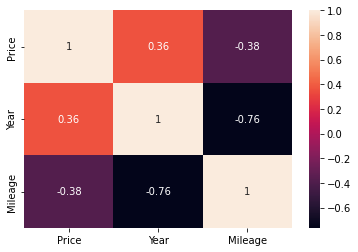

In [8]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True
           )

Как из таблицы коофицентов корреляции можно увидеть, что найболее большая взаимосвязность цены с пробегом, при чем отрицательная. И положительная - год выпуска. Чем раньше, тем дороже.

In [9]:
df2 = df.copy()
df2 = change_to_int_list("City", df2)
df2 = change_to_int_list("Make", df2)
df2 = change_to_int_list("Model", df2)
df2 = change_to_int_list("State", df2)

df2

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,851578,852072,19VDE2E53EE000083,11048,5736
1,10888,2013,NaN,845592,852121,19VDE1F52DE012636,11048,8478
2,8995,2013,48851.0,851578,852072,19VDE2E52DE000025,11048,5736
3,10999,2014,39922.0,849601,852119,19VDE1F71EE003817,11048,8478
4,0,2016,NaN,847095,852058,19UDE2F32GA001284,11048,8173
...,...,...,...,...,...,...,...,...
852117,63215,2017,9.0,852117,852120,YV1A22MK9H1013237,852121,852117
852118,72260,2017,3201.0,852118,852118,YV4A22PL3H1186162,852121,852118
852119,55999,2016,28941.0,852119,852119,YV4A22PL4G1000868,852121,852119
852120,60240,2017,3005.0,852120,852120,YV4A22NLXH1006162,852121,852120


<AxesSubplot:>

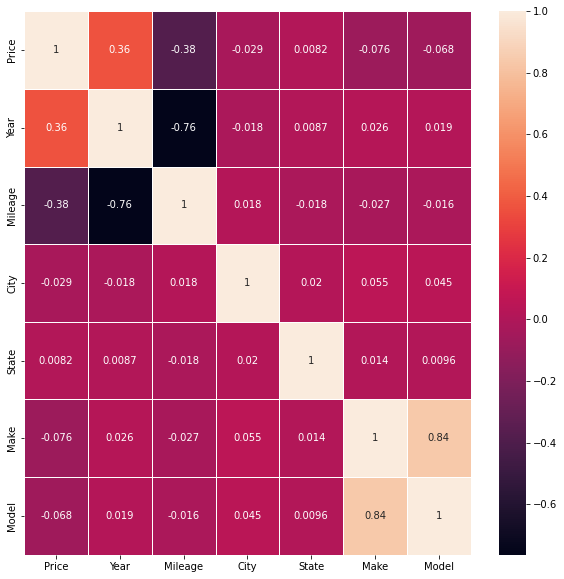

In [11]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax)

Как видим, город и штаты можем убрать, так как они почти никак не взаимосвязаны с ценой на машину.
На счет модели и компанией можем увидеть что они оба имеют слабую связь с ценой. Это озночает что машины +- одинаковы по цене не зависимо от их производителя.

In [12]:
df = df.drop(columns = ["Vin", "City", "State"])
df

,Price,Year,Mileage,Make,Model
0,8995,2014,35725.0,Acura,ILX6-Speed
1,10888,2013,NaN,Acura,ILX5-Speed
2,8995,2013,48851.0,Acura,ILX6-Speed
3,10999,2014,39922.0,Acura,ILX5-Speed
4,0,2016,NaN,Acura,ILXAutomatic
...,...,...,...,...,...
852117,63215,2017,9.0,Volvo,S90T6
852118,72260,2017,3201.0,Volvo,XC90T6
852119,55999,2016,28941.0,Volvo,XC90AWD
852120,60240,2017,3005.0,Volvo,V90


Построим дополнительные графики чтобы оценить влияние года выпуска на цену и проверить точность прошлых данных. Например, среднюю цену за автомобиль по годам, чтобы быть уверенными.

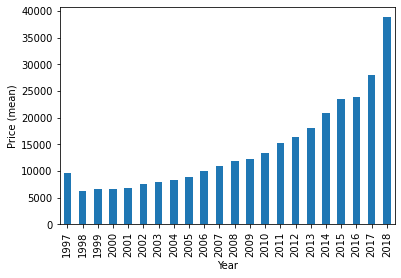

In [14]:
df.groupby('Year')['Price'].mean().plot(kind='bar') 
plt.ylabel('Price (mean)') # добавляем подпись на оси Оу
plt.show()

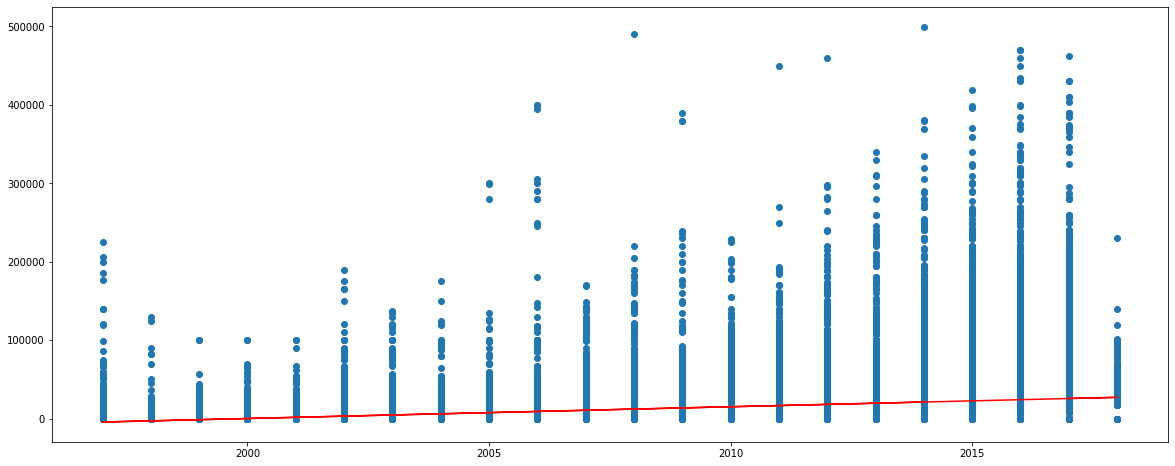

In [15]:
plt.figure(figsize=(20, 8))
x = df.Year
y = df.Price

stats = linregress(x, y)

m = stats.slope
b = stats.intercept
plt.scatter(x, y)
plt.plot(x, m * x + b, 'red')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Price'>

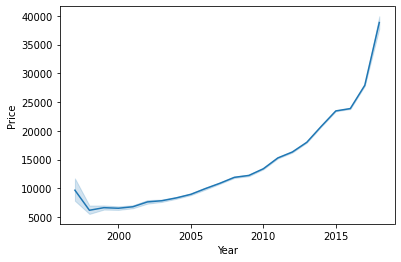

In [39]:
sns.lineplot(data=df, x="Year", y="Price")

In [16]:
df

,Price,Year,Mileage,Make,Model
0,8995,2014,35725.0,Acura,ILX6-Speed
1,10888,2013,NaN,Acura,ILX5-Speed
2,8995,2013,48851.0,Acura,ILX6-Speed
3,10999,2014,39922.0,Acura,ILX5-Speed
4,0,2016,NaN,Acura,ILXAutomatic
...,...,...,...,...,...
852117,63215,2017,9.0,Volvo,S90T6
852118,72260,2017,3201.0,Volvo,XC90T6
852119,55999,2016,28941.0,Volvo,XC90AWD
852120,60240,2017,3005.0,Volvo,V90


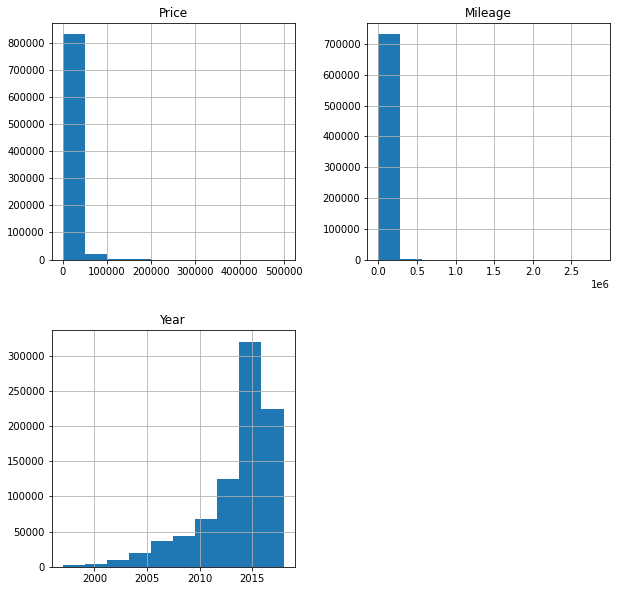

In [17]:
features = list(set(df.columns))

df[features].hist(figsize=(10,10));

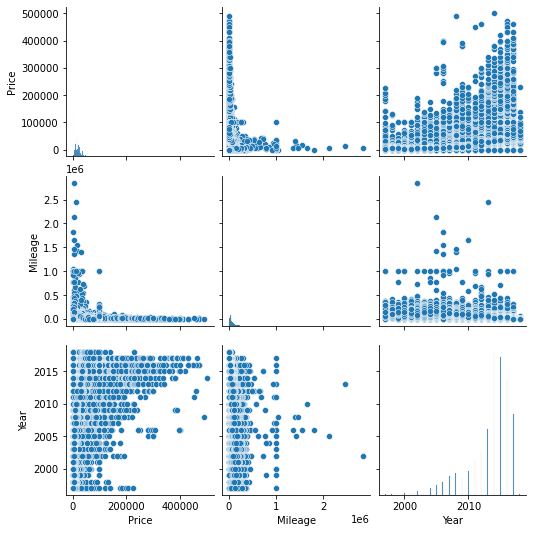

In [18]:
sns.pairplot(df[features]);

Разделим данные. 70% для тренировки и 30 процентов для теста

In [22]:
train, test = get_training_and_testing_sets(df)

In [23]:
train

,Price,Year,Mileage,Make,Model
0,8995,2014,35725.0,Acura,ILX6-Speed
1,10888,2013,NaN,Acura,ILX5-Speed
2,8995,2013,48851.0,Acura,ILX6-Speed
3,10999,2014,39922.0,Acura,ILX5-Speed
4,0,2016,NaN,Acura,ILXAutomatic
...,...,...,...,...,...
596480,11991,2008,61129.0,Mercedes-Benz,NaN
596481,6990,2006,101053.0,Mercedes-Benz,C-ClassC280
596482,3500,2002,126759.0,Mercedes-Benz,C-ClassC230
596483,17999,2014,37322.0,Mercedes-Benz,C-ClassC250


In [25]:
test

,Price,Year,Mileage,Make,Model
596485,14988,2013,65029.0,Mercedes-Benz,C-ClassC250
596486,13500,2013,82953.0,Mercedes-Benz,C-ClassC250
596487,12291,2013,97545.0,Mercedes-Benz,C-ClassC250
596488,10014,2008,96777.0,Mercedes-Benz,C-Class4dr
596489,12000,2010,75287.0,Mercedes-Benz,C-Class4dr
...,...,...,...,...,...
852117,63215,2017,9.0,Volvo,S90T6
852118,72260,2017,3201.0,Volvo,XC90T6
852119,55999,2016,28941.0,Volvo,XC90AWD
852120,60240,2017,3005.0,Volvo,V90


<AxesSubplot:>

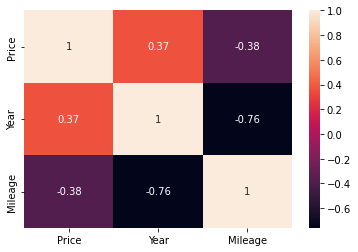

In [31]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot = True,
           );

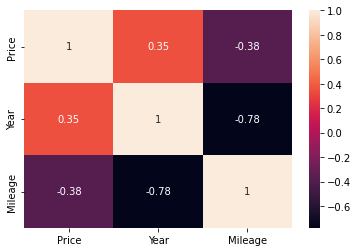

In [32]:
corr = test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot = True,
           );

<AxesSubplot:>

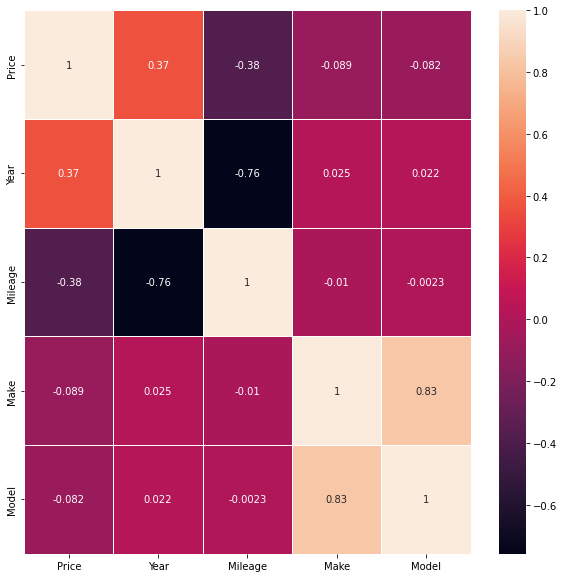

In [45]:
df2_train = train.copy()
df2_train = change_to_int_list("Make", df2_train)
df2_train = change_to_int_list("Model", df2_train)

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corr = df2_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax)

<AxesSubplot:>

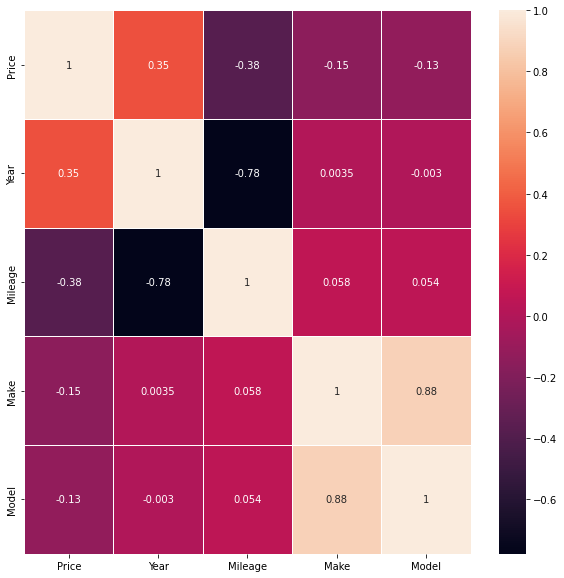

In [46]:
df2_test = test.copy()
df2_test = change_to_int_list("Make", df2_test)
df2_test = change_to_int_list("Model", df2_test)

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corr = df2_test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax)